<a href="https://colab.research.google.com/github/jxl777/CS4375/blob/main/Gradient_Descent_using_SGDRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully
               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2

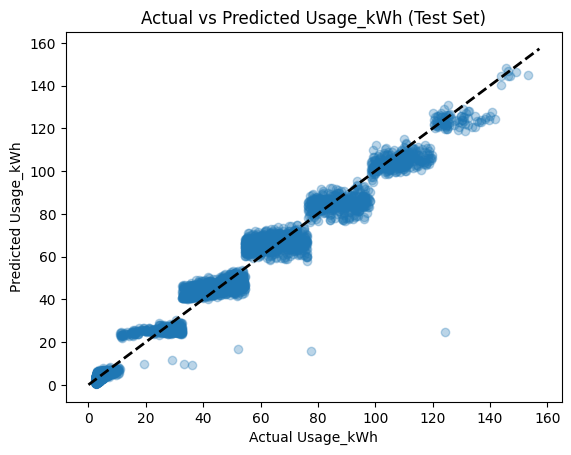

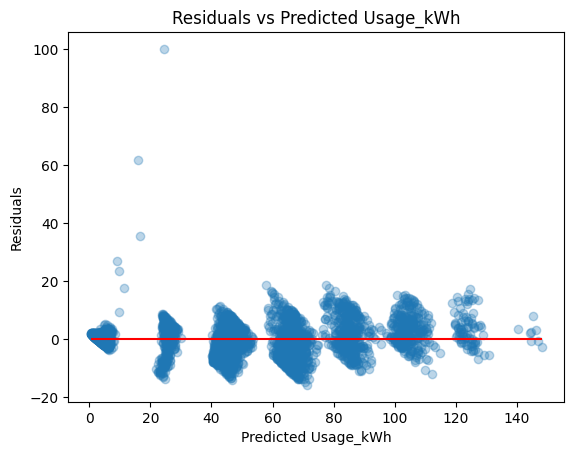

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

# URL of the dataset uploaded to GitHub
url = 'https://raw.githubusercontent.com/jxl777/CS4375/main/Steel_industry_data.csv'

# Load the dataset
try:
    data = pd.read_csv(url)
    print("Dataset loaded successfully")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows of the dataset to inspect column names and data types
print(data.head())
print(data.columns)

# Identify the target variable (dependent variable)
target_variable = 'Usage_kWh'

# Step 1: Remove null or NA values
data = data.dropna()
print(f"Dataset shape after removing null values: {data.shape}")

# Step 2: Remove redundant rows (duplicate rows)
data = data.drop_duplicates()
print(f"Dataset shape after removing duplicate rows: {data.shape}")

# Step 3: Convert categorical variables to numerical variables if there are any
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = data[col].astype('category').cat.codes



# Split the dataset into features and target variable
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a bias term (column of ones) to the feature matrix
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Step 6: Train the model using SGDRegressor
model = SGDRegressor(max_iter=10000, tol=1e-6, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model's performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training Mean Squared Error (Scikit-Learn): {mse_train}')
print(f'Test Mean Squared Error (Scikit-Learn): {mse_test}')
print(f'Training R² Score (Scikit-Learn): {r2_train}')
print(f'Test R² Score (Scikit-Learn): {r2_test}')

# Print the final parameters (coefficients and intercept)
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Plot predicted vs actual values for the test set
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual Usage_kWh')
plt.ylabel('Predicted Usage_kWh')
plt.title('Actual vs Predicted Usage_kWh (Test Set)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Plot residuals
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.xlabel('Predicted Usage_kWh')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Usage_kWh')
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r')
plt.show()
